# Import des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lire le fichier Excel
def lecture_excel():
    df = pd.read_excel('https://ciqual.anses.fr/cms/sites/default/files/inline-files/Table%20Ciqual%202020_FR_2020%2007%2007.xls')


    # Sélection des variables : noms, calories, sucres, fibres alimentaires, protéines, gludices, lipides
    df = df.loc[:,["alim_grp_nom_fr","alim_ssgrp_nom_fr","alim_ssssgrp_nom_fr","alim_nom_fr","Energie, Règlement UE N° 1169/2011 (kcal/100 g)","Sucres (g/100 g)","Fibres alimentaires (g/100 g)","Protéines, N x 6.25 (g/100 g)","Glucides (g/100 g)","Lipides (g/100 g)"]]

    # Renommer les variables
    df = df.rename(columns={'alim_grp_nom_fr': 'Groupe', 'alim_ssgrp_nom_fr':'Sous-groupe', 'alim_ssssgrp_nom_fr':'Sous-sous-groupe', 'alim_nom_fr':'Nom', 'Energie, Règlement UE N° 1169/2011 (kcal/100 g)': 'Calories', 'Sucres (g/100 g)' : 'Sucres', 'Fibres alimentaires (g/100 g)' : 'Fibres', 'Protéines, N x 6.25 (g/100 g)' : 'Protéines', 'Glucides (g/100 g)' : 'Glucides', 'Lipides (g/100 g)' : 'Lipides'})

    # Noms des Groupes et Sous-groupes en majuscule
    df['Groupe'] = df['Groupe'].str.title()
    df['Sous-groupe'] = df['Sous-groupe'].str.title()

    # Elimination des plats composés
    df = df[~df["Groupe"].isin(['Entrées Et Plats Composés','Glaces Et Sorbets','Aliments Infantiles'])]

    # Supression des valeurs manquantes
    df_svm = df.replace(to_replace=r'^<.*', value=np.nan, regex=True)
    df_svm = df_svm.dropna()
    for i in range(6):
        df_svm = df_svm[df_svm.iloc[:,i+4] != '-']
        df_svm = df_svm[df_svm.iloc[:,i+4] != 'traces']
    nombre_de_lignes_svm = df_svm.shape[0]

    # Conversion en numéique 
    for i in range(6):
        df_svm.iloc[:,i+4] = pd.to_numeric(df_svm.iloc[:,i+4].str.replace(',', '.', regex=False))

    return df,df_svm

# Premières lignes du dataframe
df, df_svm = lecture_excel()
print(df_svm.head())

                                          Groupe Sous-groupe Sous-sous-groupe  \
338  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   
341  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   
344  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   
345  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   
346  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   

                                Nom Calories Sucres Fibres Protéines Glucides  \
338              Avocat, pulpe, cru    205.0    0.4    3.6      1.56     0.83   
341      Champignon, tout type, cru     21.7   1.43   1.72      2.37     1.88   
344                 Chou-fleur, cru     26.2    1.7    2.2      1.81     2.13   
345   Concombre, pulpe et peau, cru     15.6   1.67    0.6      0.64     2.54   
346  Courgette, pulpe et peau, crue     16.5   1.79   1.05      1.23      1.8   

    Lipides  
338    20.6 

# Statistiques descriptives

Répartition des ingrédients par groupe :

                                        Groupe  Nombre  Pourcentage
0         Viandes, Œufs, Poissons Et Assimilés     381         33.4
1                      Eaux Et Autres Boissons     153         13.4
2  Fruits, Légumes, Légumineuses Et Oléagineux     152         13.3
3                          Produits Céréaliers     116         10.2
4                              Produits Sucrés     110          9.6
5       Aides Culinaires Et Ingrédients Divers      87          7.6
6               Produits Laitiers Et Assimilés      84          7.4
7                             Matières Grasses      58          5.1


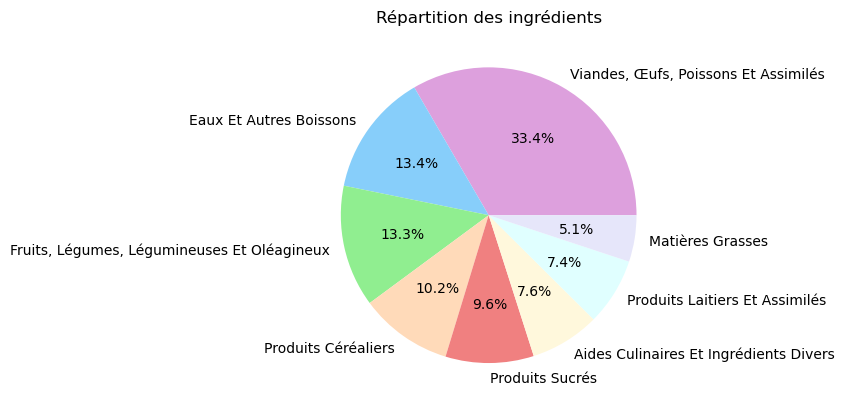

In [5]:
# Tableau
counts = df_svm['Groupe'].str.title().value_counts()
df_counts = counts.reset_index()
df_counts.columns = ['Groupe', 'Nombre']
df_counts['Pourcentage'] = round(100 * (df_counts['Nombre'] / df_counts['Nombre'].sum()),1)
print(df_counts)

# Diagramme circulaire
counts.plot(kind='pie', autopct='%1.1f%%', colors=['plum', 'lightskyblue', 'lightgreen','peachpuff','lightcoral','cornsilk','lightcyan','lavender','pink','lightgrey'] )
plt.title("Répartition des ingrédients")
plt.ylabel('')  # Cache l'étiquette de l'axe Y
plt.show()

Plus précisément, en ce qui concerne le groupe *Viandes, Œufs, Poissons et Assimilés* :

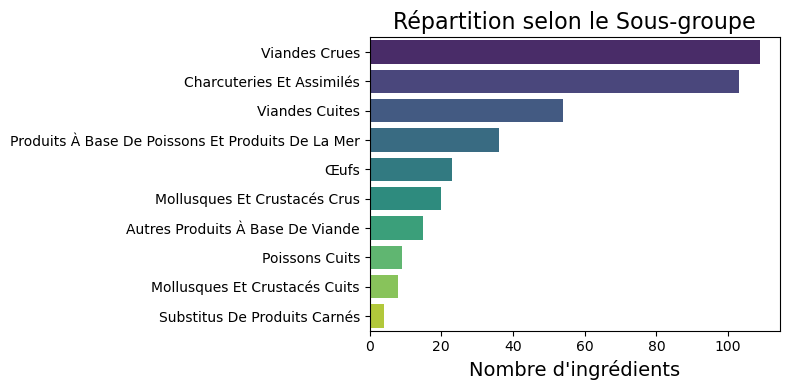

In [6]:
# Calcul des fréquences 
df_groupe_viande = df_svm.loc[df_svm["Groupe"] == "Viandes, Œufs, Poissons Et Assimilés",:]
frequence = df_groupe_viande['Sous-groupe'].value_counts()

# Barplot en utilisant seaborn
plt.figure(figsize=(8,4))
sns.barplot(x=frequence.values, y=frequence.index, palette='viridis',hue=frequence.index, legend = False)

# Labels et titre
plt.title("Répartition selon le Sous-groupe", fontsize=16)
plt.xlabel("Nombre d'ingrédients", fontsize=14)
plt.ylabel("", fontsize=14)

# Afficher le plot
plt.tight_layout()
plt.show()

**Distribution des variables *Calories* et *Protéines* selon le Groupe :**
- Les viandes, œufs et poissons ont plus de protéines 
- Les produits sucrés ont plus de calories
- Les fruits et légumes sont peu caloriques

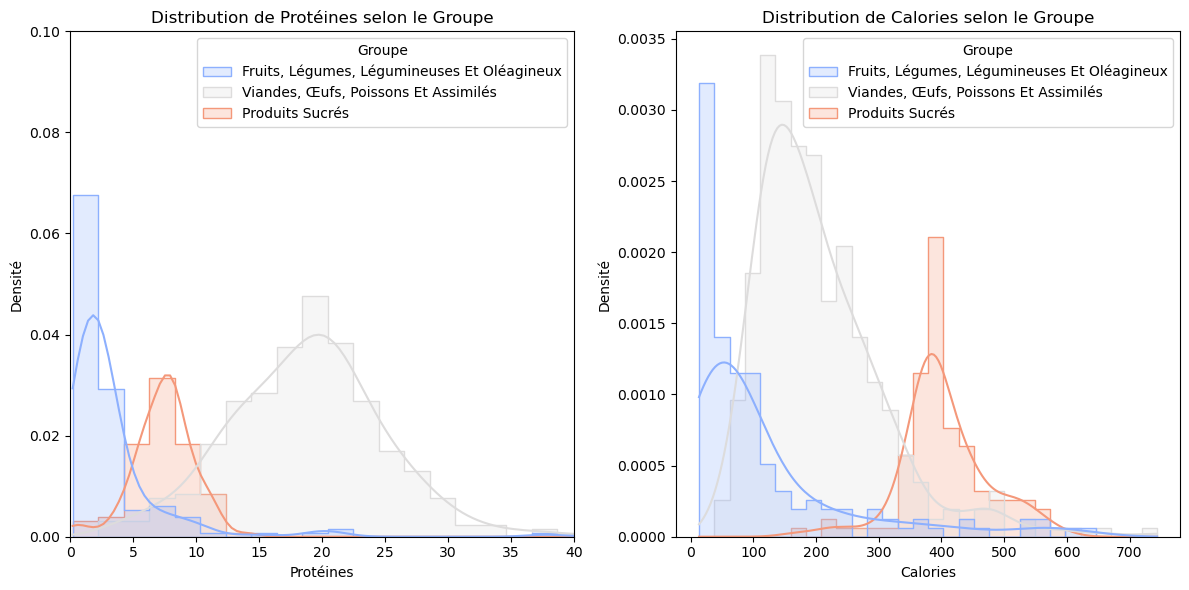

In [7]:
plt.figure(figsize=(12, 6))
df_viande_fruits_sucrés = df_svm[df_svm['Groupe'].isin(['Fruits, Légumes, Légumineuses Et Oléagineux','Viandes, Œufs, Poissons Et Assimilés','Produits Sucrés'])]

# Protéines
plt.subplot(1, 2, 1)
sns.histplot(data=df_viande_fruits_sucrés, x='Protéines', hue='Groupe', kde=True, element='step', palette='coolwarm', stat='density', bins=40)
plt.title("Distribution de Protéines selon le Groupe")
plt.ylabel("Densité")
plt.xlim(0,40)
plt.ylim(0,0.1)

# Calories
plt.subplot(1, 2, 2)
sns.histplot(data=df_viande_fruits_sucrés, x='Calories', hue='Groupe', kde=True, element='step', palette='coolwarm', stat='density', bins=30)
plt.title("Distribution de Calories selon le Groupe")
plt.ylabel("Densité")
plt.xlim()
plt.ylim()

# Afficher le plot
plt.tight_layout()
plt.show()

**Distribution de la variable *Glucides* selon le groupe :**

Les produits céréaliers et les produits sucrés ont plus de glucides

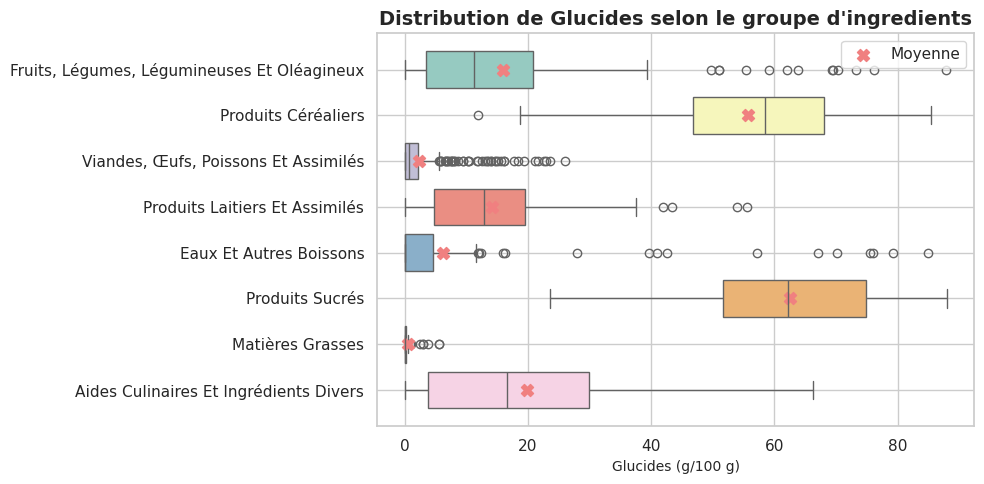

In [8]:
# Création du graphique 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))  

# Boxplot
ax = sns.boxplot(y='Groupe', x='Glucides', data=df_svm, palette="Set3", hue = 'Groupe', legend = False)

# Calculer les moyennes par catégorie
mean_values = df_svm.groupby('Groupe')['Glucides'].mean().reset_index()

# Ajouter des croix pour les moyennes
ax.scatter(mean_values['Glucides'], mean_values['Groupe'], color='lightcoral', marker='X', s=75, label='Moyenne', zorder = 2)

# Ajout des étiquettes et du titre
plt.title("Distribution de Glucides selon le groupe d'ingredients", fontsize=14,fontweight='bold')
plt.xlabel('Glucides (g/100 g)', fontsize=10)
plt.ylabel('')

# Afficher le graphique
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scraping Marmiton

In [2]:
# Imports
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
with open('Recette.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Recettes','Ingredients', 'Quantites','Notes','Commentaires','Personnes','Temps','Difficulte','Prix'])
    for k in range(2,10):
        url = 'https://www.marmiton.org/recettes/index/categorie/plat-principal/'
        url = url + str(k)
        response = requests.get(url) # Effectuer la requête HTTP
        soup = BeautifulSoup(response.content, 'html.parser') # Parser le contenu HTML de la page
        liens = soup.findAll("div",{"class" : "mrtn-card__title"})
        recettes = [lien.text.strip() for lien in liens]
        for j in range(len(liens)):
            url2 = liens[j].find('a')['href']
            response = requests.get(url2)
            soup = BeautifulSoup(response.content, 'html.parser')
            ingr_quant = soup.findAll("span",{"class": "card-ingredient-title"})
            ingredients = [i.find("span", {"class":"ingredient-name"}) for i in ingr_quant]
            quantites = []
            for i in ingr_quant:
                quantite = i.find("span", {"class":"count"})
                if quantite.text.strip():
                    quantites += [quantite.text.strip()]
                else:
                    quantites += ['0']
            notes = soup.find("span",{"class":"recipe-header__rating-text"})
            commentaires = soup.find("div",{"class":"recipe-header__comment"})
            personnes = soup.find("div",{"class":"mrtn-recette_ingredients-counter"})
            temps = soup.findAll("div",{"class":"recipe-primary__item"})
            for i in range(len(ingredients)):
                writer.writerow([recettes[j],ingredients[i].text.strip(),quantites[i],notes.text.strip(),int(commentaires.text.strip().split()[0]),personnes.get("data-servingsnb"),temps[0].text.strip(),temps[1].text.strip(),temps[2].text.strip()])


In [14]:
# Lecture des données
from statistics import median
marmiton = pd.read_csv("Recette.csv")

# Composition des recettes
composition = marmiton.loc[:,['Recettes', 'Ingredients', 'Quantites']]
print(composition.head())

# Propriétés des recettes + Nombre d'ingrédients
recette = marmiton.drop(columns=['Ingredients','Quantites'])
recette = recette.dropna()
col = recette.columns.tolist()
recette['Nombre_ingr'] = recette.groupby(col).transform('size')
recette = recette.drop_duplicates(subset = col)

# Notes et Temps en numérique
recette['Notes'] = recette['Notes'].str.split('/').str[0].astype(float)

def minute(x):
    if str(x) == 'nan':
        return -1
    l = str(x).split('h')
    if len(l) == 1:
        if l[0].strip() == '':
            l[0] = '0'
        return int(l[0].split('min')[0])
    for i in range(2):
        if l[i].strip() == '':
            l[i] = '0'
    return 60*int(l[0])+int(l[1])

recette['Minutes'] = recette['Temps'].apply(minute)

# Moyenne et difficile / moyen et assez cher

recette['Difficulte'] = recette['Difficulte'].replace({'difficile': 'moyenne'})
recette['Difficulte'] = recette['Difficulte'].replace({'facile': 'moyenne'})
recette['Prix'] = recette['Prix'].replace({'moyen': 'assez cher'})

#Succès :
recette['Succes'] = (recette["Notes"] >= median(recette['Notes'])).astype(int)

print(recette.head())

           Recettes Ingredients  Quantites
0  Poulet basquaise      poivre        0.0
1  Poulet basquaise         sel        0.0
2  Poulet basquaise     oignons        3.0
3  Poulet basquaise     poivron      700.0
4  Poulet basquaise      tomate        1.0
                                             Recettes  Notes  Commentaires  \
0                                    Poulet basquaise    4.7           702   
10        Blanquette de veau : recette traditionnelle    4.9          2920   
23  Filet mignon de porc rôti à la moutarde à l'an...    4.6            36   
32                         Lapin à la moutarde maison    4.8           484   
46                               Rôti de veau au four    4.7            72   

    Personnes Temps   Difficulte        Prix  Nombre_ingr  Minutes  Succes  
0           6  1h20      moyenne  assez cher           10       80       1  
10          4  2h15  très facile  assez cher           13      135       1  
23          6  1h40      moyenne  assez ch

/tmp/ipykernel_131537/3688701637.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


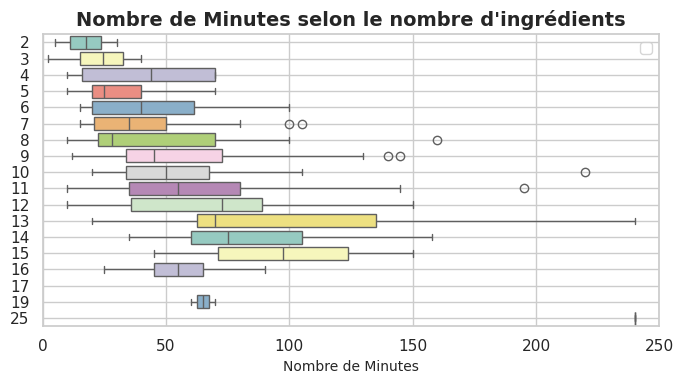

In [18]:
# Création du graphique : 
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))  
recette['Nombre_ingr'] = recette['Nombre_ingr'].astype('category')

# Boxplot
ax = sns.boxplot(y='Nombre_ingr', x='Minutes', data=recette, palette="Set3", hue = 'Nombre_ingr', legend = False)

# Ajout des étiquettes et du titre
plt.title("Nombre de Minutes selon le nombre d'ingrédients", fontsize=14,fontweight='bold')
plt.xlabel('Nombre de Minutes', fontsize=10)
plt.ylabel('')

# Afficher le graphique
plt.xlim(0,250)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

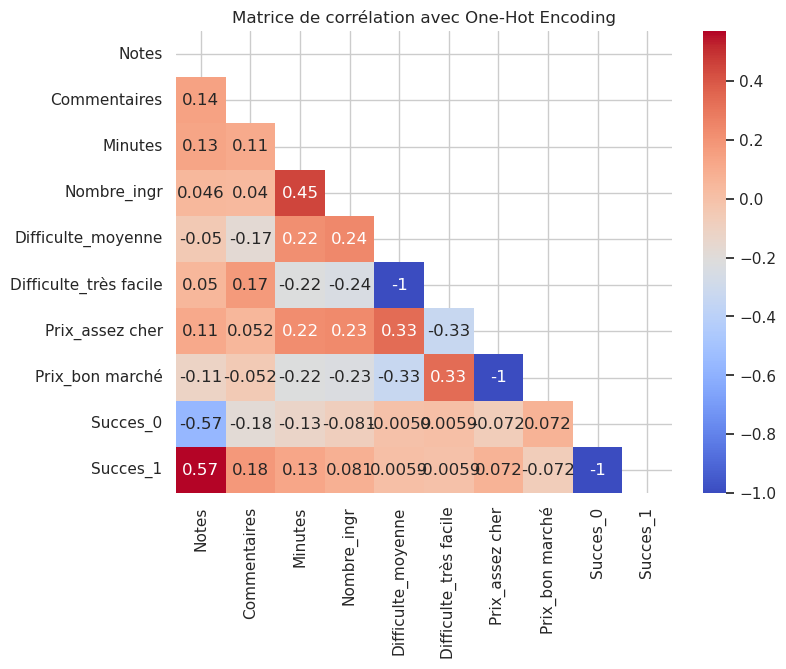

In [19]:
# Corrélations entre les variables :
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Créer le data.frame df
df = recette.loc[
    :,
    [
        "Notes",
        "Commentaires",
        "Minutes",
        "Nombre_ingr",
        "Difficulte",
        "Prix",
        "Succes"
    ],
]

df_encoded = pd.get_dummies(df, columns=['Difficulte','Prix','Succes'])
corr = df_encoded.corr(method='pearson')
mask = np.zeros_like(corr,dtype = np.bool_)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm",mask=mask)
plt.title("Matrice de corrélation avec One-Hot Encoding")
plt.show()

In [66]:
# Modèle de régression : Notes

import pandas as pd
import statsmodels.api as sm

df = recette.loc[
    :,
    [
        "Notes",
        "Commentaires",
        "Minutes",
        "Nombre_ingr",
        "Prix",
        "Difficulte",
        "Succes"
    ],
]
df = pd.get_dummies(df, columns=['Prix','Difficulte','Succes'], drop_first=True)

df['log_Minutes'] = (df['Minutes'])**2
df['log_C'] = np.log(df['Commentaires']+1)
df.head()
# Définition des variables dépendante et indépendantes
X = df[['Succes_1','Difficulte_très facile','Minutes','log_Minutes']]
y = df['log_C']


# Assurez-vous que les données sont converties en types compatibles (float ou int)
X = X.astype(float)
y = y.astype(float)
X = sm.add_constant(X)
# Régression linéaire
model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  log_C   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     9.738
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.65e-07
Time:                        16:14:38   Log-Likelihood:                -381.65
No. Observations:                 239   AIC:                             773.3
Df Residuals:                     234   BIC:                             790.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

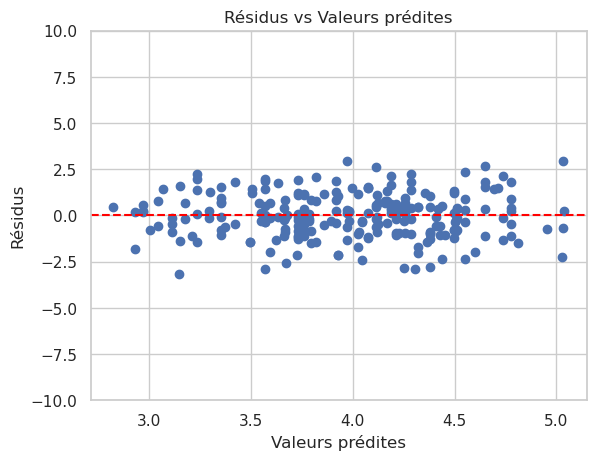

In [69]:
import matplotlib.pyplot as plt

# Exemple avec résidus et valeurs prédites
y_pred = model.predict(X)
residus = y - y_pred  # y: valeurs réelles, y_pred: valeurs prédites
plt.scatter(y_pred, residus)
plt.axhline(0, color='red', linestyle='--')
plt.ylim(-10,10)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Résidus vs Valeurs prédites')
plt.show()

In [53]:
robust_model = sm.OLS(y, X).fit(cov_type='HC0')
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Commentaires   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     4.526
Date:                Thu, 28 Nov 2024   Prob (F-statistic):            0.00417
Time:                        16:01:35   Log-Likelihood:                -1655.9
No. Observations:                 239   AIC:                             3320.
Df Residuals:                     235   BIC:                             3334.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -203

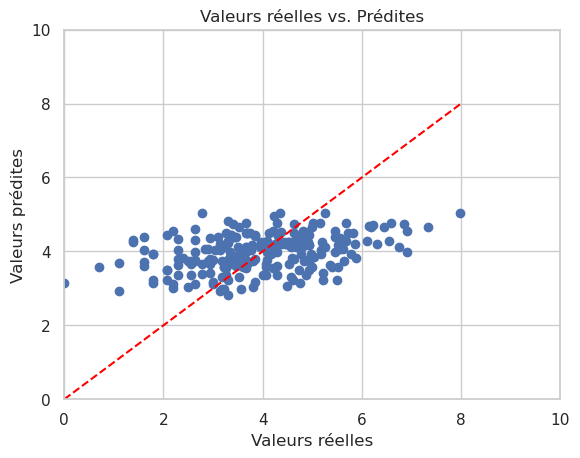

In [71]:
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles vs. Prédites')
plt.show()

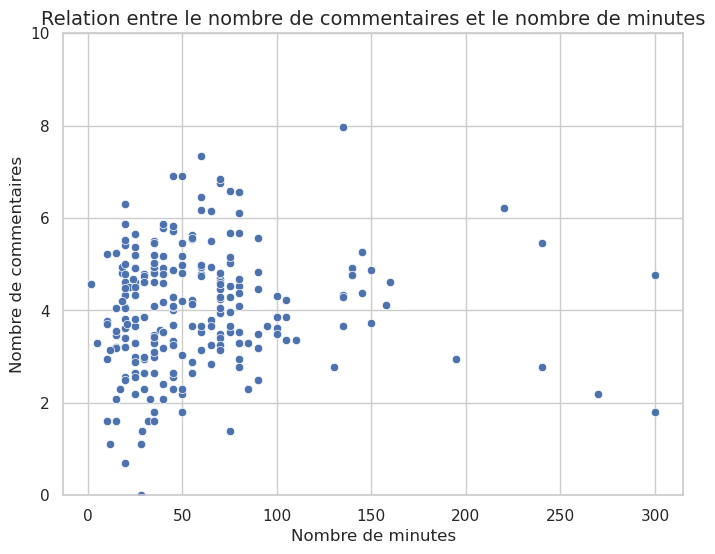

In [76]:
plt.figure(figsize=(8, 6))  # Taille du graphique
sns.scatterplot(
    x='Minutes', 
    y='log_C', 
    data=df
)

plt.title('Relation entre le nombre de commentaires et le nombre de minutes', fontsize=14)
plt.xlabel('Nombre de minutes', fontsize=12)
plt.ylabel('Nombre de commentaires', fontsize=12)
plt.ylim(0,10)
plt.grid(True)
plt.show()